In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('../data/jetblue_NYairports_featureEngineering_df.csv')
print(data.columns)

Index(['searchDate', 'route', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'elapsedDays', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'baseFare', 'totalFare', 'seatsRemaining',
       'totalTravelDistance', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode',
       'segmentsDepartureAirportCode', 'segmentsAirlineName',
       'segmentsDurationInSeconds', 'segmentsCabinCode', 'departureTime',
       'arrivalTime', 'departureCategory', 'arrivalCategory', 'daysLeft',
       'numStops'],
      dtype='object')


In [4]:
data.head()

,searchDate,route,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,segmentsDepartureAirportCode,segmentsAirlineName,segmentsDurationInSeconds,segmentsCabinCode,departureTime,arrivalTime,departureCategory,arrivalCategory,daysLeft,numStops
0,2022-04-16,ATL|EWR,2022-04-17,ATL,EWR,PT2H9M,0,False,False,True,...,ATL,JetBlue Airways,7740,coach,07:30:00,09:39:00,Morning,Morning,1,0
1,2022-04-16,ATL|JFK,2022-04-17,ATL,JFK,PT2H15M,0,False,False,True,...,ATL,JetBlue Airways,8100,coach,09:00:00,11:15:00,Morning,Noon,1,0
2,2022-04-16,ATL|JFK,2022-04-17,ATL,JFK,PT2H23M,0,False,False,True,...,ATL,JetBlue Airways,8580,coach,18:50:00,21:13:00,Afternoon,Evening,1,0
3,2022-04-16,ATL|LGA,2022-04-17,ATL,LGA,PT2H16M,0,False,False,True,...,ATL,JetBlue Airways,8160,coach,12:03:00,14:19:00,Noon,Noon,1,0
4,2022-04-16,ATL|LGA,2022-04-17,ATL,LGA,PT2H19M,0,False,False,True,...,ATL,JetBlue Airways,8340,coach,10:40:00,12:59:00,Morning,Noon,1,0


##### train test split

In [6]:
X = data[['totalTravelDistance', 'daysLeft', 'seatsRemaining', 'numStops']]
y = data['totalFare']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=20241216)

model = RandomForestRegressor(n_estimators=100, random_state=20241216)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 15193.247083322045


In [ ]:
data['flightDate'] = pd.to_datetime(data['flightDate'])

earliest_date = data['flightDate'].min()
latest_date = data['flightDate'].max()

print(f"Earliest flight date: {earliest_date}")
print(f"Latest flight date: {latest_date}")


Earliest flight date: 2022-04-17 00:00:00
Latest flight date: 2022-11-19 00:00:00


##### comparing the test model predictions to the actual data

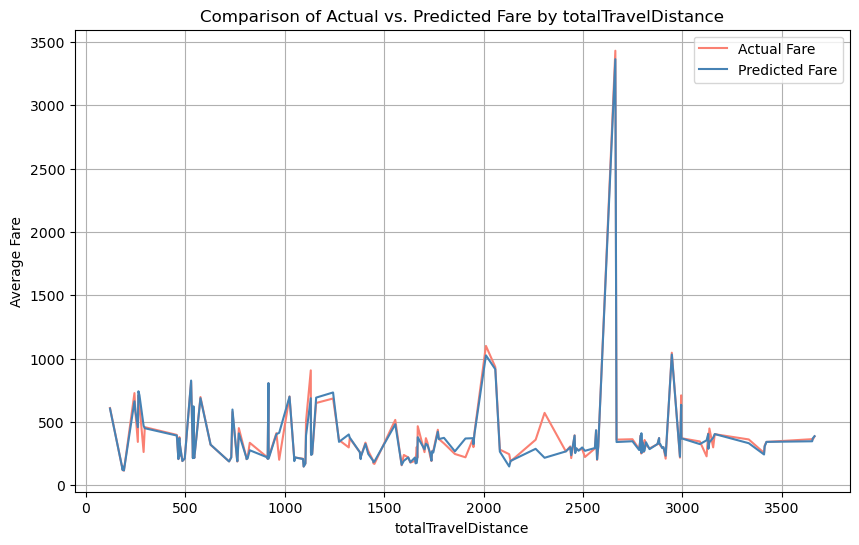

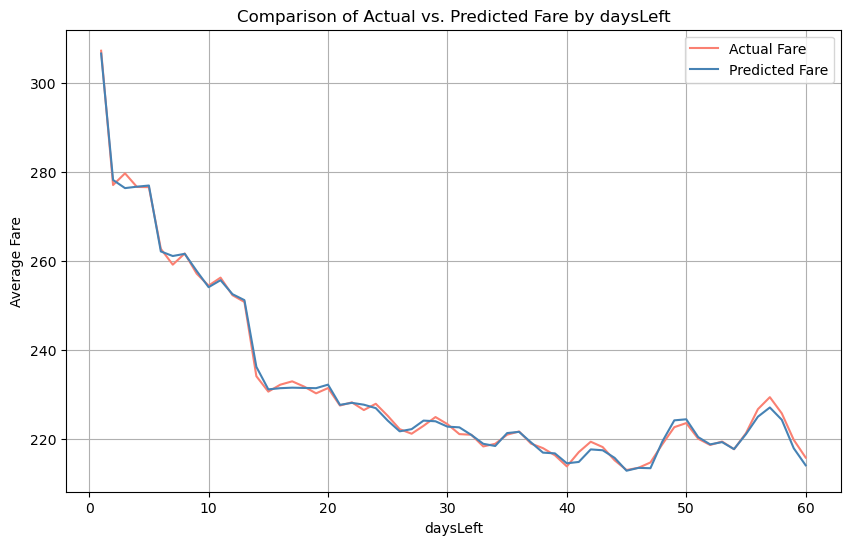

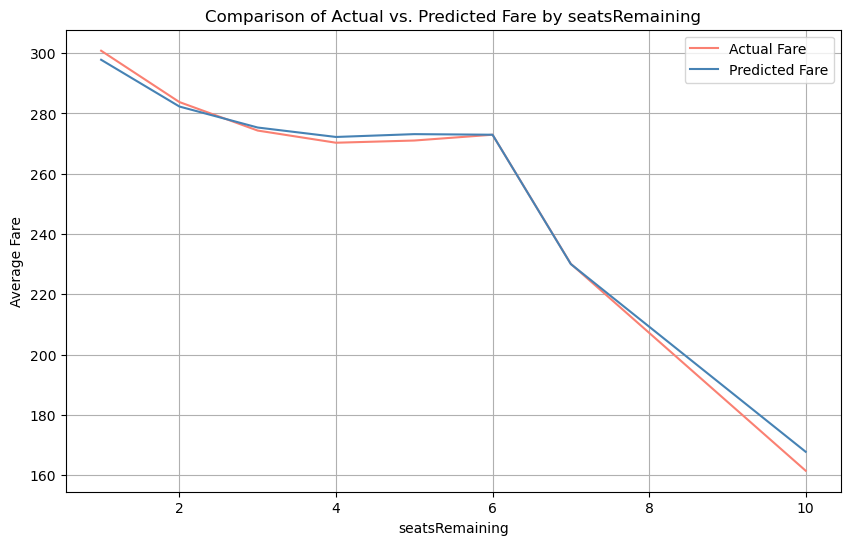

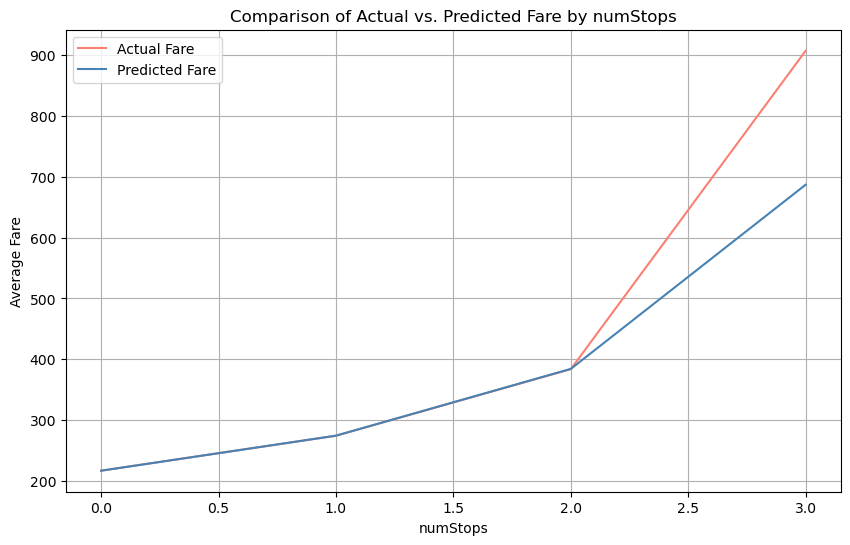

In [4]:
results = X_test.copy()
results['Actual Total Fare'] = y_test
results['Predicted Total Fare'] = y_pred

features = ['totalTravelDistance', 'daysLeft', 'seatsRemaining', 'numStops']

for feature in features:
    avg_results = results.groupby(feature).mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(avg_results[feature], avg_results['Actual Total Fare'], label='Actual Fare', color='salmon')
    plt.plot(avg_results[feature], avg_results['Predicted Total Fare'], label='Predicted Fare', color='steelblue')
    plt.xlabel(feature)
    plt.ylabel("Average Fare")
    plt.title(f"Comparison of Actual vs. Predicted Fare by {feature}")
    plt.legend()
    plt.grid(True)
    plt.show()

##### correlation matrix of the features selected to total fare

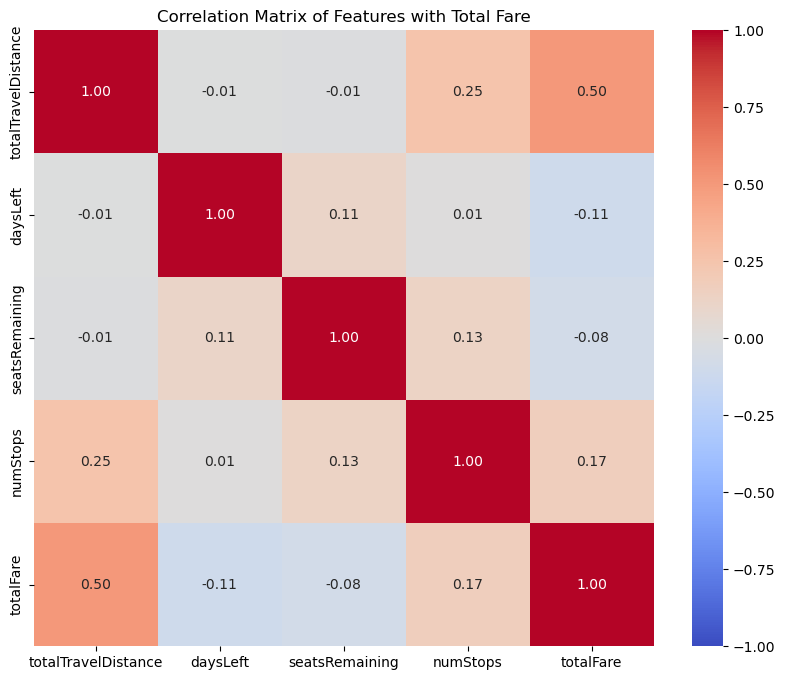

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target into one DataFrame
features = ['totalTravelDistance', 'daysLeft', 'seatsRemaining', 'numStops']
data_corr = data[features + ['totalFare']]  # Add the target variable

# Compute the correlation matrix
corr_matrix = data_corr.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features with Total Fare")
plt.show()

In [6]:
# Correlation of each feature with totalFare
correlation_with_target = corr_matrix['totalFare'].sort_values(ascending=False)
print(correlation_with_target)


totalFare              1.000000
totalTravelDistance    0.504738
numStops               0.167086
seatsRemaining        -0.082564
daysLeft              -0.108159
Name: totalFare, dtype: float64


## outlier stuff

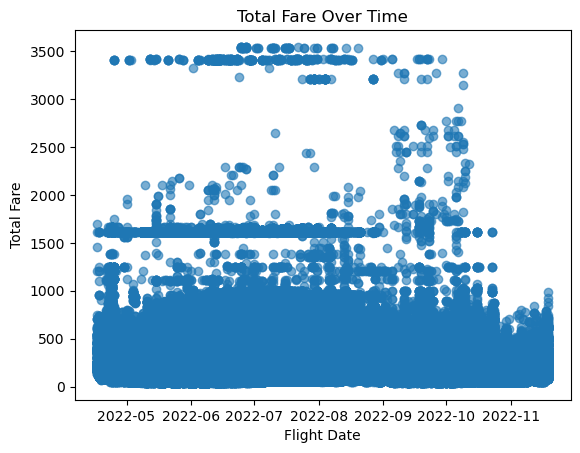

In [25]:
import matplotlib.pyplot as plt

# Ensure the flightDate column is in datetime format
data['flightDate'] = pd.to_datetime(data['flightDate'])

# Plot all fares against flight dates
plt.scatter(data['flightDate'], data['totalFare'], alpha=0.6)
plt.title('Total Fare Over Time')
plt.xlabel('Flight Date')
plt.ylabel('Total Fare')
plt.show()


In [41]:
# Total number of data points
total_data_points = data.shape[0]

# Number of data points where totalFare > 1500
above_1500_count = data[data['totalFare'] > 1500].shape[0]

# Percentage of data points above 1500
percentage_above_1500 = (above_1500_count / total_data_points) * 100

print(f"Total number of data points: {total_data_points}")
print(f"Number of data points with totalFare above 1500: {above_1500_count}")
print(f"Percentage of data points above 1500: {percentage_above_1500:.2f}%")


Total number of data points: 3949480
Number of data points with totalFare above 1500: 19518
Percentage of data points above 1500: 0.49%


##### it looks like the totalFare is mainly under 1500 dollars, if we wanted to have a cutoff point i think 1500 is a good place, either that or 1000

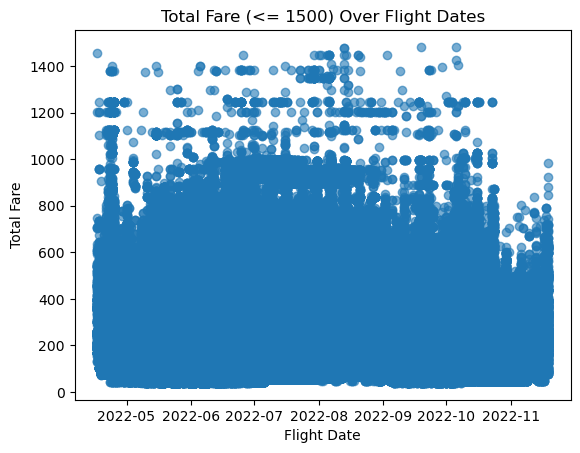

In [42]:
import matplotlib.pyplot as plt

# Filter data to include only rows where totalFare <= 1500
filtered_data = data[data['totalFare'] <= 1500]

# Plot the filtered data
plt.scatter(filtered_data['flightDate'], filtered_data['totalFare'], alpha=0.6)
plt.title('Total Fare (<= 1500) Over Flight Dates')
plt.xlabel('Flight Date')
plt.ylabel('Total Fare')
plt.show()
